# The Sparks Foundation - #GRIPJUNE21

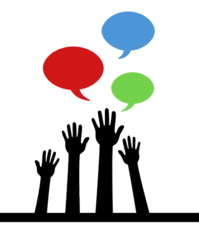

# Author: SAMYAK RASTOGI


# PS: Predict the percentage of an student based on the no. of study hours.

# ---------------------------------------------------------------------------------------------------------------

## importing the required libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## importing and understanding the dataset

In [32]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.info() #gives a concise summary of DataFrame

#### Observation - The dataset has 25 rows and 2 columns with 0 null values

In [ ]:
df.describe() #computes a summary of statistics pertaining to the DataFrame columns

## extracting 'x' and 'y'

In [ ]:
#iloc[] function to work with numeric indexing of the data frame
x = df.iloc[: , :-1].values
y = df.iloc[: , -1].values
print(x)
print("-------------------------")
print(y)

## visualizing the data

In [ ]:
plt.scatter(x,y,color = 'blue')
plt.title('Hours v/s Percentage')
plt.xlabel('Hours of Study')
plt.ylabel('Score in Percentage')
plt.show()

#### Observation - There is a linear correlation between the study hours and percentage score

## splitting the data into training and test set

In [24]:
from sklearn.model_selection import train_test_split as tts
#train_test_split randomly shuffles and divides all rows
#in order to have same shuffle, same seed value(42 in this case) is given to random_state argument
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.25, random_state = 42)

## training and implementing the model

In [ ]:
#importing the linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train) #train this model by giving x_train and y_train as inputs

In [ ]:
#prediction of values
y_pred = lr.predict(x_test) 
print(y_pred)

## comparing the actual and predicted values

In [ ]:
compare = pd.DataFrame({ 'Actual' : y_test, 'Predicted' : y_pred})
print(compare)

## visualizing the predicted output

In [ ]:
plt.scatter(x_test, y_test, color='blue') #plotting the data-points
plt.plot(x_train, lr.predict(x_train), color='red') #plotting the prediction line
plt.title('Prediction Result')
plt.xlabel('Hours of Study')
plt.ylabel('Score in Percentage')
plt.show()

## model evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:",mean_squared_error(y_test, y_pred))
print("R^2 score:",r2_score(y_test, y_pred))

## Q: What will be predicted score if a student studies for 9.25 hrs/ day?

In [ ]:
hours = float(input('Enter the number of study hrs/day: '))
pred = lr.predict([[hours]])
print('Predicted Percentage: %.3f ' %(pred))

# Conclusion:
## 1. A student will score 92.336% if he/she studies for 9.25 hrs/day
## 2. The r^2 value for this Linear Regression model is 0.955